# FBI Uniform Crime Reporting Analysis | 2012

## Data Modeling

In [1]:
# Importing Important Libraries

# Fundamental Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Modeling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Libraries for Performance Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Data Collection

In [2]:
file='fbi_crime_reporting.xlsx'
offence = pd.read_excel(file, skiprows=3, skipfooter=4, header=[1], index_col=[0,1,2,3])
offence.reset_index(inplace=True)

In [3]:
display(offence.head())
display(offence.tail())

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,6803,80.0,14.0,63.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803,79.0,21.0,56.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,15.0
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,6803,42.0,3.0,39.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803,56.0,14.0,39.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5234,WISCONSIN,Other Agencies - Tribal,St. Croix Tribal,6803,14.0,1.0,10.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11.0


### Data Cleaning

Since we know that there are a lot of missing values, we have replaced the NaN values with 0.

We opted to replace missing values with 0 rather than imputing values because the absence of data indicates no recorded crime in the area. Imputing values could have artificially inflated the crime statistics, potentially misrepresenting the actual occurrences.

In [4]:
offence.isna().sum().sum()

160052

In [5]:
offence.fillna(0, inplace=True)

In [6]:
new_columns = [name.replace('\n', '').replace(' ', '').replace('-', '') for name in offence.columns]
new_columns

['State',
 'AgencyType',
 'AgencyName',
 'Population1',
 'AssaultOffenses',
 'AggravatedAssault',
 'SimpleAssault',
 'Intimidation',
 'HomicideOffenses',
 'MurderandNonnegligentManslaughter',
 'NegligentManslaughter',
 'JustifiableHomicide',
 'Kidnapping/Abduction',
 'SexOffenses',
 'Rape',
 'Sodomy',
 'SexualAssaultWithAnObject',
 'Fondling',
 'SexOffenses,Nonforcible',
 'Incest',
 'StatutoryRape',
 'Arson',
 'Bribery',
 'Burglary/Breaking&Entering',
 'Counterfeiting/Forgery',
 'Destruction/Damage/Vandalism',
 'Embezzlement',
 'Extortion/Blackmail',
 'FraudOffenses',
 'FalsePretenses/Swindle/ConfidenceGame',
 'CreditCard/AutomatedTellerMachineFraud',
 'Impersonation',
 'WelfareFraud',
 'WireFraud',
 'LarcenyTheftOffenses',
 'Pocketpicking',
 'Pursesnatching',
 'Shoplifting',
 'TheftFromBuilding',
 'TheftFromCoinoperatedMachine',
 'TheftFromMotorVehicle',
 'TheftofMotorVehiclePartsorAccessories',
 'AllOtherLarceny',
 'MotorVehicleTheft',
 'Robbery',
 'StolenPropertyOffenses',
 'Drug/Na

In [7]:
offence.columns = new_columns
offence.head()

,State,AgencyType,AgencyName,Population1,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,MurderandNonnegligentManslaughter,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Pornography/ObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


### Data Exploration & Feature Extraction

Based on the context of Data Modeling

In [8]:
offence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   5235 non-null   object 
 1   AgencyType                              5235 non-null   object 
 2   AgencyName                              5235 non-null   object 
 3   Population1                             5235 non-null   int64  
 4   AssaultOffenses                         5235 non-null   float64
 5   AggravatedAssault                       5235 non-null   float64
 6   SimpleAssault                           5235 non-null   float64
 7   Intimidation                            5235 non-null   float64
 8   HomicideOffenses                        5235 non-null   float64
 9   MurderandNonnegligentManslaughter       5235 non-null   float64
 10  NegligentManslaughter                   5235 non-null   floa

In [9]:
offence.describe().T

,count,mean,std,min,25%,50%,75%,max
Population1,5235.0,15200.455396,35589.992307,8.0,2991.5,8011.0,16317.0,770101.0
AssaultOffenses,5235.0,218.492264,1023.651283,0.0,11.0,41.0,136.0,38998.0
AggravatedAssault,5235.0,36.551671,233.840147,0.0,1.0,5.0,17.0,9447.0
SimpleAssault,5235.0,140.048711,608.683274,0.0,6.0,25.0,87.0,22320.0
Intimidation,5235.0,41.891882,222.321583,0.0,1.0,6.0,25.0,9057.0
HomicideOffenses,5235.0,0.713467,7.048852,0.0,0.0,0.0,0.0,411.0
MurderandNonnegligentManslaughter,5235.0,0.649475,6.593031,0.0,0.0,0.0,0.0,386.0
NegligentManslaughter,5235.0,0.036103,0.242651,0.0,0.0,0.0,0.0,6.0
JustifiableHomicide,5235.0,0.027889,0.473592,0.0,0.0,0.0,0.0,25.0
Kidnapping/Abduction,5235.0,2.863419,16.413885,0.0,0.0,0.0,1.0,794.0


In [10]:
for i in sorted(offence.columns):
    print(i, end=', ')

AgencyName, AgencyType, AggravatedAssault, AllOtherLarceny, Arson, AssaultOffenses, AssistingorPromotingProstitution, Betting/Wagering, Bribery, Burglary/Breaking&Entering, Counterfeiting/Forgery, CreditCard/AutomatedTellerMachineFraud, Destruction/Damage/Vandalism, Drug/NarcoticOffenses, Drug/NarcoticViolations, DrugEquipmentViolations, Embezzlement, Extortion/Blackmail, FalsePretenses/Swindle/ConfidenceGame, Fondling, FraudOffenses, GamblingEquipmentViolations, GamblingOffenses, HomicideOffenses, Impersonation, Incest, Intimidation, JustifiableHomicide, Kidnapping/Abduction, LarcenyTheftOffenses, MotorVehicleTheft, MurderandNonnegligentManslaughter, NegligentManslaughter, Operating/Promoting/AssistingGambling, Pocketpicking, Population1, Pornography/ObsceneMaterial, Prostitution, ProstitutionOffenses, Pursesnatching, Rape, Robbery, SexOffenses, SexOffenses,Nonforcible, SexualAssaultWithAnObject, Shoplifting, SimpleAssault, Sodomy, SportsTampering, State, StatutoryRape, StolenProperty

In [11]:
crime_categories = ['AssaultOffenses', 'Bribery', 'Burglary/Breaking&Entering', 'Destruction/Damage/Vandalism', 'Drug/NarcoticOffenses', 'Embezzlement', 'Extortion/Blackmail', 'FraudOffenses', 'GamblingOffenses', 'HomicideOffenses', 'Kidnapping/Abduction', 'LarcenyTheftOffenses', 'MotorVehicleTheft', 'Counterfeiting/Forgery', 'Pornography/ObsceneMaterial', 'ProstitutionOffenses', 'Robbery', 'SexOffenses', 'SexOffenses,Nonforcible', 'StolenPropertyOffenses', 'WeaponLawViolations']

offence['TotalCrime'] = offence[crime_categories].sum(axis=1)
crime_categories.append('TotalCrime')

offence.head()

,State,AgencyType,AgencyName,Population1,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,MurderandNonnegligentManslaughter,...,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Pornography/ObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations,TotalCrime
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0,4303.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,2692.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0,10141.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0,3025.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,779.0


#### Feature Extraction

In [12]:
categories = ['Population1', 'Drug/NarcoticOffenses', 'Drug/NarcoticViolations', 'DrugEquipmentViolations', 'TheftFromBuilding', 'TheftFromCoinoperatedMachine', 'TheftFromMotorVehicle', 'TheftofMotorVehiclePartsorAccessories', 'TotalCrime']

model_task1 = offence[categories]
model_task1.head()

,Population1,Drug/NarcoticOffenses,Drug/NarcoticViolations,DrugEquipmentViolations,TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle,TheftofMotorVehiclePartsorAccessories,TotalCrime
0,82332,495.0,339.0,156.0,410.0,4.0,418.0,127.0,4303.0
1,36986,308.0,152.0,156.0,12.0,1.0,52.0,52.0,2692.0
2,214264,2069.0,979.0,1090.0,96.0,3.0,720.0,35.0,10141.0
3,214264,437.0,208.0,229.0,0.0,0.0,8.0,4.0,3025.0
4,5439,66.0,44.0,22.0,39.0,0.0,39.0,0.0,779.0


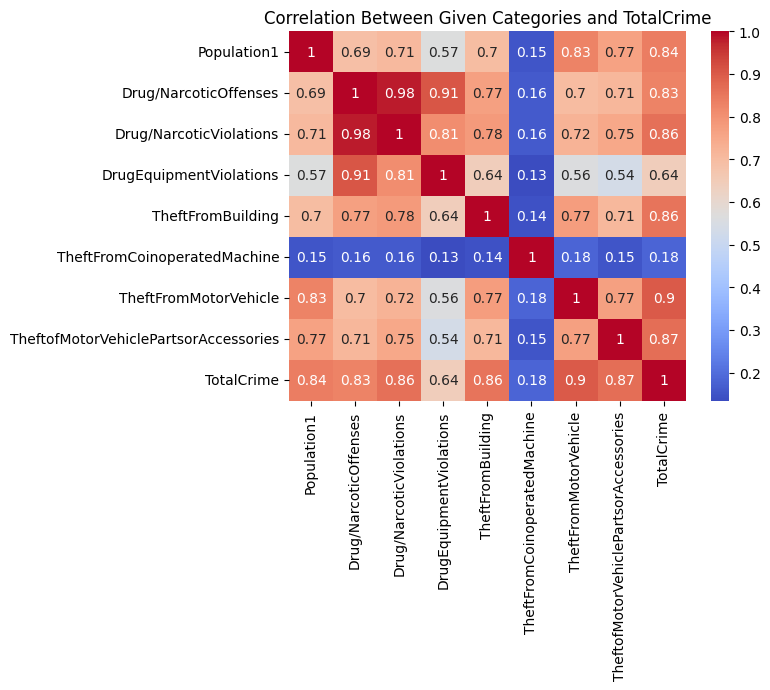

In [13]:
cr = model_task1.corr()
sns.heatmap(cr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Given Categories and TotalCrime');

We can see that Drug/ Narcotic Offenses is highly correlated with Drug Equipment Violations and Drug/Narcotic Violation. This is due to the fact that Drug/Narcotic Offenses is the sum of the latter 2. Therefore we delete these two columns and only keep Drug/ Narcotic Offenses.

In [14]:
model_task1 = model_task1.drop(['Drug/NarcoticViolations', 'DrugEquipmentViolations'], axis=1)

In [15]:
model_task1

,Population1,Drug/NarcoticOffenses,TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle,TheftofMotorVehiclePartsorAccessories,TotalCrime
0,82332,495.0,410.0,4.0,418.0,127.0,4303.0
1,36986,308.0,12.0,1.0,52.0,52.0,2692.0
2,214264,2069.0,96.0,3.0,720.0,35.0,10141.0
3,214264,437.0,0.0,0.0,8.0,4.0,3025.0
4,5439,66.0,39.0,0.0,39.0,0.0,779.0
...,...,...,...,...,...,...,...
5230,6803,196.0,110.0,0.0,36.0,8.0,1264.0
5231,6803,55.0,29.0,0.0,28.0,8.0,749.0
5232,6803,49.0,0.0,0.0,3.0,1.0,374.0
5233,6803,92.0,12.0,0.0,12.0,1.0,349.0


In [16]:
# Partitioning the data
X = model_task1.iloc[:, :-1]
y = model_task1.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
X_train=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test=(X_test-X_test.mean(axis=0))/X_test.std(axis=0)

In [18]:
# Building the Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [19]:
def rmse_metric(mse):
    return np.sqrt(mse)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = rmse_metric(mse)
r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Cross Validation MSE Score:", mean_mse)


Mean Absolute Error (MAE): 317.3451054635959
Mean Squared Error (MSE): 2005663.407247953
Root Mean Squared Error (RMSE): 1416.2144637193735
R-squared (R2): 0.9069077162292691
Cross Validation MSE Score: 1160663.68010855


In [21]:
models = {
    "LinearRegression": LinearRegression(fit_intercept=True),
    "ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

LinearRegression trained.
ridge trained.
lasso trained.


In [22]:
for name, model in models.items():
    test_pred = model.predict(X_test)
    print(name)
    mse = mean_squared_error(y_test, test_pred)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error (MSE):", mse)
    print('RMSE : ', rmse_metric(mse))
    print("R-squared (R2):", r2_score(y_test, test_pred))

    cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    print("Cross Validation MSE Score:", mean_mse)
    print("----------X----------X----------")
    

LinearRegression
Mean Absolute Error (MAE): 317.3451054635959
Mean Squared Error (MSE): 2005663.407247953
RMSE :  1416.2144637193735
R-squared (R2): 0.9069077162292691
Cross Validation MSE Score: 1160663.68010855
----------X----------X----------
ridge
Mean Absolute Error (MAE): 317.12027669416545
Mean Squared Error (MSE): 1971887.833014985
RMSE :  1404.239236389222
R-squared (R2): 0.9084753996848541
Cross Validation MSE Score: 1160663.68010855
----------X----------X----------
lasso
Mean Absolute Error (MAE): 317.3108295752016
Mean Squared Error (MSE): 2005915.414862157
RMSE :  1416.3034331887206
R-squared (R2): 0.9068960193691434
Cross Validation MSE Score: 1160663.68010855
----------X----------X----------


#### Feature Extraction For Task 2

In [23]:
columns_to_select = ['Population1'] + crime_categories

summarized = offence.loc[:, columns_to_select]
summarized.head()

,Population1,AssaultOffenses,Bribery,Burglary/Breaking&Entering,Destruction/Damage/Vandalism,Drug/NarcoticOffenses,Embezzlement,Extortion/Blackmail,FraudOffenses,GamblingOffenses,...,MotorVehicleTheft,Counterfeiting/Forgery,Pornography/ObsceneMaterial,ProstitutionOffenses,Robbery,SexOffenses,"SexOffenses,Nonforcible",StolenPropertyOffenses,WeaponLawViolations,TotalCrime
0,82332,870.0,0.0,391.0,280.0,495.0,70.0,0.0,202.0,0.0,...,88.0,55.0,4.0,0.0,46.0,25.0,0.0,29.0,26.0,4303.0
1,36986,559.0,0.0,237.0,447.0,308.0,0.0,1.0,162.0,0.0,...,68.0,58.0,1.0,0.0,21.0,35.0,2.0,28.0,25.0,2692.0
2,214264,1242.0,2.0,728.0,2303.0,2069.0,20.0,4.0,486.0,0.0,...,171.0,163.0,16.0,0.0,59.0,79.0,16.0,100.0,75.0,10141.0
3,214264,555.0,3.0,363.0,542.0,437.0,0.0,1.0,192.0,0.0,...,75.0,26.0,5.0,2.0,10.0,39.0,24.0,24.0,40.0,3025.0
4,5439,197.0,0.0,99.0,97.0,66.0,0.0,0.0,13.0,0.0,...,7.0,15.0,1.0,0.0,1.0,4.0,0.0,9.0,4.0,779.0


Text(0.5, 1.0, 'Correlation Between CrimeType and TotalCrime')

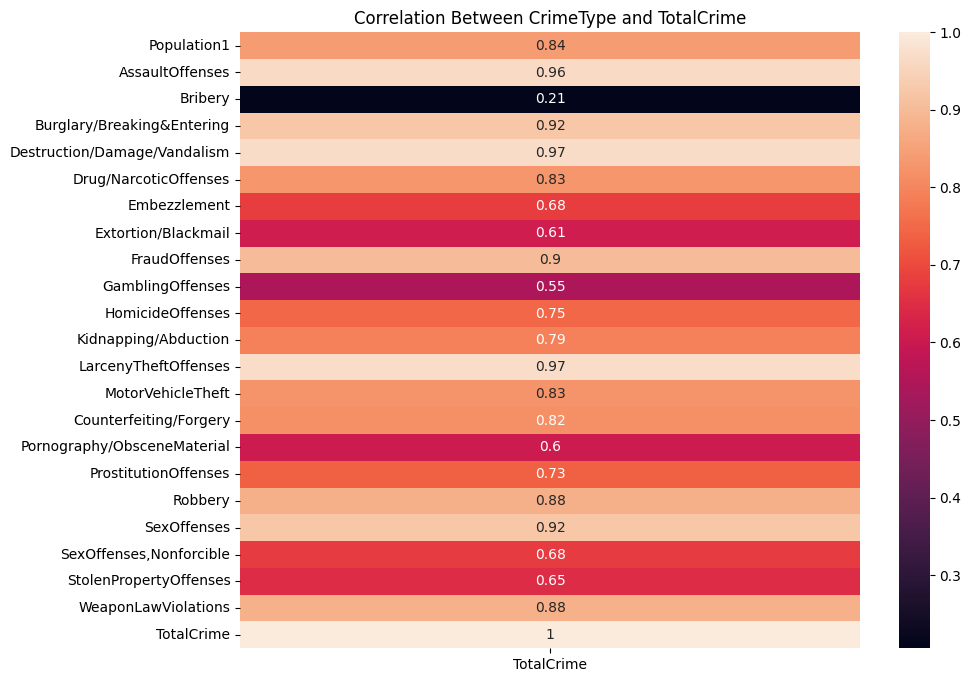

In [24]:
plt.figure(figsize=(10, 8))

cr = summarized.corr()
sns.heatmap(cr[['TotalCrime']], annot=True)
plt.title('Correlation Between CrimeType and TotalCrime')

In [25]:
dummies = pd.get_dummies(offence[['AgencyType']])
model = pd.concat([dummies, summarized], axis=1)
model.head()

,AgencyType_Cities,AgencyType_Metropolitan Counties,AgencyType_Nonmetropolitan Counties,AgencyType_Other Agencies,AgencyType_Other Agencies - Tribal,AgencyType_State Police Agencies,AgencyType_Universities and Colleges,Population1,AssaultOffenses,Bribery,...,MotorVehicleTheft,Counterfeiting/Forgery,Pornography/ObsceneMaterial,ProstitutionOffenses,Robbery,SexOffenses,"SexOffenses,Nonforcible",StolenPropertyOffenses,WeaponLawViolations,TotalCrime
0,True,False,False,False,False,False,False,82332,870.0,0.0,...,88.0,55.0,4.0,0.0,46.0,25.0,0.0,29.0,26.0,4303.0
1,True,False,False,False,False,False,False,36986,559.0,0.0,...,68.0,58.0,1.0,0.0,21.0,35.0,2.0,28.0,25.0,2692.0
2,True,False,False,False,False,False,False,214264,1242.0,2.0,...,171.0,163.0,16.0,0.0,59.0,79.0,16.0,100.0,75.0,10141.0
3,False,True,False,False,False,False,False,214264,555.0,3.0,...,75.0,26.0,5.0,2.0,10.0,39.0,24.0,24.0,40.0,3025.0
4,True,False,False,False,False,False,False,5439,197.0,0.0,...,7.0,15.0,1.0,0.0,1.0,4.0,0.0,9.0,4.0,779.0


In [26]:
X = summarized.iloc[:, :-1]
y = summarized.iloc[:, [-1]]

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

featureScores['Score']=featureScores['Score'].round(0)
print(featureScores.nlargest(15,'Score'))

                           Specs        Score
0                    Population1  393518523.0
1                AssaultOffenses   25085644.0
12          LarcenyTheftOffenses   21206766.0
3     Burglary/Breaking&Entering   11114478.0
4   Destruction/Damage/Vandalism    9638968.0
13             MotorVehicleTheft    8784145.0
5          Drug/NarcoticOffenses    6520771.0
17                       Robbery    6038722.0
8                  FraudOffenses    3319392.0
21           WeaponLawViolations    1589089.0
16          ProstitutionOffenses    1291314.0
18                   SexOffenses     823683.0
14        Counterfeiting/Forgery     764146.0
11          Kidnapping/Abduction     489596.0
6                   Embezzlement     468434.0


In [27]:
temp = ['TotalCrime', 'AgencyType_Cities', 'AgencyType_Metropolitan Counties',
       'AgencyType_Nonmetropolitan Counties', 'AgencyType_Other Agencies',
       'AgencyType_Other Agencies - Tribal',
       'AgencyType_State Police Agencies',
       'AgencyType_Universities and Colleges']

final_features = temp + featureScores.nlargest(15,'Score')['Specs'].to_list()
final_features

['TotalCrime',
 'AgencyType_Cities',
 'AgencyType_Metropolitan Counties',
 'AgencyType_Nonmetropolitan Counties',
 'AgencyType_Other Agencies',
 'AgencyType_Other Agencies - Tribal',
 'AgencyType_State Police Agencies',
 'AgencyType_Universities and Colleges',
 'Population1',
 'AssaultOffenses',
 'LarcenyTheftOffenses',
 'Burglary/Breaking&Entering',
 'Destruction/Damage/Vandalism',
 'MotorVehicleTheft',
 'Drug/NarcoticOffenses',
 'Robbery',
 'FraudOffenses',
 'WeaponLawViolations',
 'ProstitutionOffenses',
 'SexOffenses',
 'Counterfeiting/Forgery',
 'Kidnapping/Abduction',
 'Embezzlement']

In [28]:
X = model[final_features].iloc[:, 1:]
y = model[final_features].iloc[:, [0]]

X_train, X_test, y_train, y_test = train_test_split(model, y, test_size=0.25)

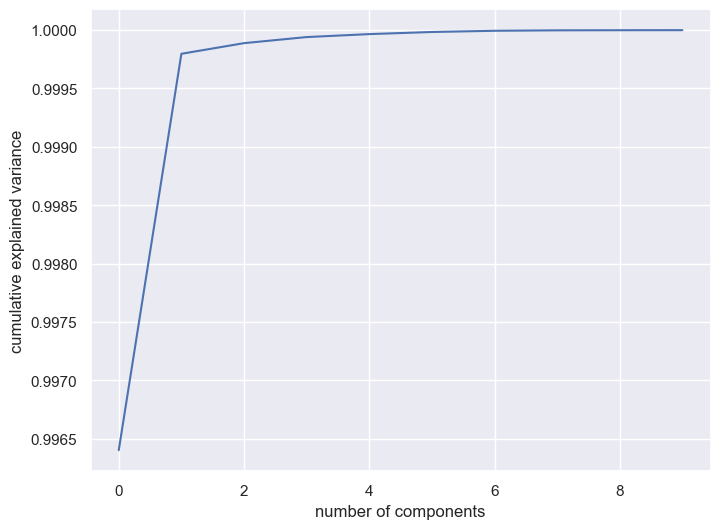

None

In [29]:
pca_test = PCA(n_components=10)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [30]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [31]:
models = {
    "LinearRegression": LinearRegression(fit_intercept=True),
    "Ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42),
    # "k-NN": KNeighborsRegressor(n_neighbors=5, metric='manhattan'),
    # "Gradient": SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000),
    # "Random Forest": RandomForestRegressor(n_estimators=1000),
    # "svm" : SVR(kernel='linear', C=10, epsilon=0.1)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    print(name + " trained.")

LinearRegression trained.
Ridge trained.
Lasso trained.


In [32]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    mse = mean_squared_error(y_test, test_pred)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error (MSE):", mse)
    print('RMSE : ', rmse_metric(mse))
    print("R-squared (R2):", r2_score(y_test, test_pred))
    
    cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    print("Cross Validation MSE Score:", mean_mse)
    print("----------X----------X----------")
    

LinearRegression
Mean Absolute Error (MAE): 0.7941515084512091
Mean Squared Error (MSE): 3.053330050131848
RMSE :  1.747378050145946
R-squared (R2): 0.9999991790525132
Cross Validation MSE Score: 2.901473046787978e-22
----------X----------X----------
Ridge
Mean Absolute Error (MAE): 0.7941611916811921
Mean Squared Error (MSE): 3.0533989633159644
RMSE :  1.7473977690600284
R-squared (R2): 0.9999991790339846
Cross Validation MSE Score: 2.901473046787978e-22
----------X----------X----------
Lasso
Mean Absolute Error (MAE): 9.16321593734132
Mean Squared Error (MSE): 558.5323698821402
RMSE :  23.63328944269376
R-squared (R2): 0.9998498276511939
Cross Validation MSE Score: 2.901473046787978e-22
----------X----------X----------
